Sampling: [a_beta, a_trunc_normal]


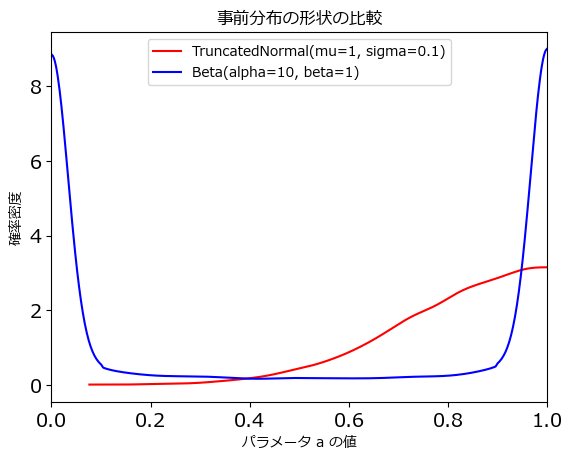

In [5]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# --- 0. プロット設定 ---
plt.rcParams['font.family'] = "Meiryo"
plt.rcParams['figure.dpi'] = 100

# 2つの事前分布を比較
with pm.Model():
    a_trunc_normal = pm.TruncatedNormal('a_trunc_normal', mu=1.0, sigma=0.25, lower=0.0, upper=1.0)
    a_beta = pm.Beta('a_beta', alpha=0.1, beta=0.1)
    
    prior_samples = pm.sample_prior_predictive(samples=10000, random_seed=42)

az.plot_dist(prior_samples.prior['a_trunc_normal'], label='TruncatedNormal(mu=1, sigma=0.1)', color='red')
az.plot_dist(prior_samples.prior['a_beta'], label='Beta(alpha=10, beta=1)', color='blue')
plt.title('事前分布の形状の比較')
plt.xlabel('パラメータ a の値')
plt.ylabel('確率密度')
plt.legend()
plt.xlim(0, 1.0)
plt.show()
